In [1]:
import pandas as pd
from google.colab import files

In [2]:
uploaded = files.upload()

Saving CrimesOnWomenData.csv to CrimesOnWomenData.csv


In [3]:
data = pd.read_csv("CrimesOnWomenData.csv")
print(data.head())

   Unnamed: 0              State  Year  Rape   K&A   DD   AoW   AoM    DV  WT
0           0     ANDHRA PRADESH  2001   871   765  420  3544  2271  5791   7
1           1  ARUNACHAL PRADESH  2001    33    55    0    78     3    11   0
2           2              ASSAM  2001   817  1070   59   850     4  1248   0
3           3              BIHAR  2001   888   518  859   562    21  1558  83
4           4       CHHATTISGARH  2001   959   171   70  1763   161   840   0


In [4]:
# Проверка на пропущенные значения
print(data.isnull().sum())

Unnamed: 0    0
State         0
Year          0
Rape          0
K&A           0
DD            0
AoW           0
AoM           0
DV            0
WT            0
dtype: int64


In [5]:
# Выбор признаков для кластеризации
features = data[['Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT']]

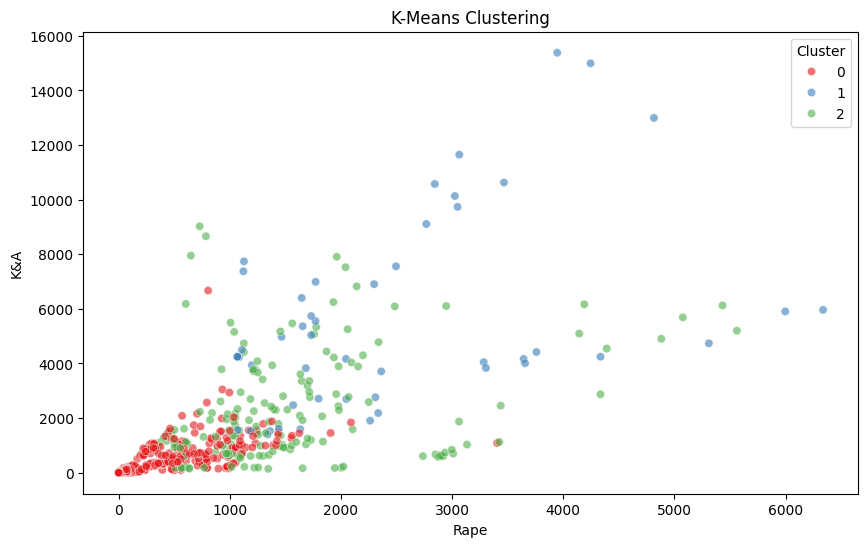

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Определение количества кластеров
kmeans = KMeans(n_clusters=3, random_state=42)
data['KMeans_Cluster'] = kmeans.fit_predict(features)

# Визуализация K-Means
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rape', y='K&A', hue='KMeans_Cluster', data=data, palette='Set1', alpha=0.6)
plt.title('K-Means Clustering')
plt.xlabel('Rape')
plt.ylabel('K&A')
plt.legend(title='Cluster')
plt.show()

Метод K-Means разделил данные на 3 четких кластера, которые хорошо визуализируются на графике.

*   Кластер 0 (красные точки) объединяет регионы с относительно низкими значениями "Rape" и "K&A".
*   Кластер 1 (зеленые точки) включает регионы со средними значениями этих показателей.
*   Кластер 2 (синие точки) представляет регионы с высокими значениями "Rape" и "K&A", то есть высоким уровнем соответствующих преступлений.

Такое четкое разделение позволяет выделить группы регионов с различными характеристиками преступности и сравнить их между собой.

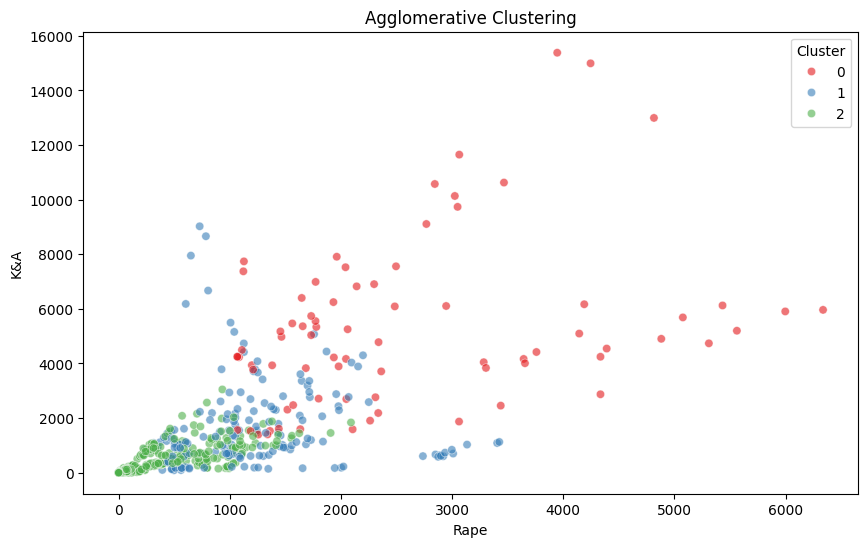

In [7]:
from sklearn.cluster import AgglomerativeClustering

# Агломеративная кластеризация
agglo = AgglomerativeClustering(n_clusters=3)
data['Agglo_Cluster'] = agglo.fit_predict(features)

# Визуализация агломеративной кластеризации
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rape', y='K&A', hue='Agglo_Cluster', data=data, palette='Set1', alpha=0.6)
plt.title('Agglomerative Clustering')
plt.xlabel('Rape')
plt.ylabel('K&A')
plt.legend(title='Cluster')
plt.show()

Агломеративная кластеризация также выделяет 3 основных кластера, но их границы менее четкие по сравнению с K-Means.
Кластеры имеют более сложную форму и распределение на графике, что отражает более детальную структуру данных.
Например, кластер 2 (зеленые точки) объединяет регионы с низкими значениями "Rape" и "K&A", но с более разнообразными остальными характеристиками.
Такой подход позволяет лучше понять иерархические связи между регионами и выявить более тонкие особенности структуры данных.

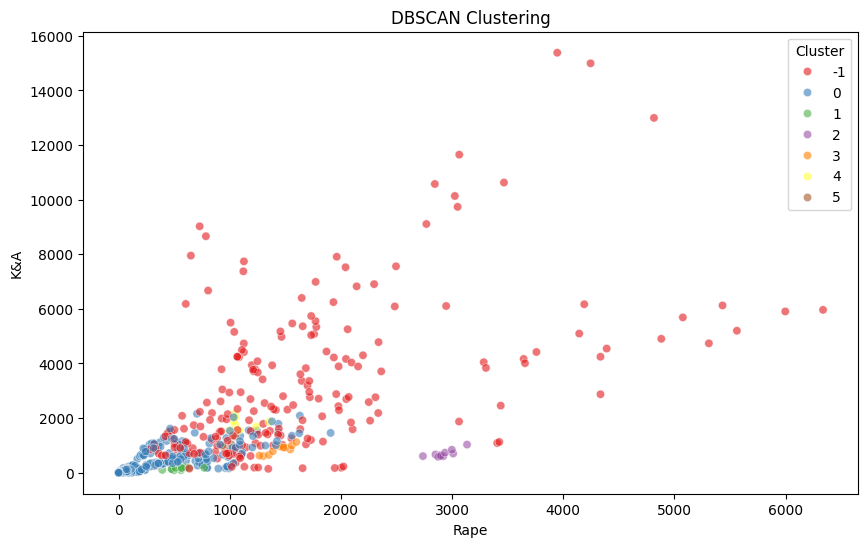

In [8]:
from sklearn.cluster import DBSCAN

# Нормализация данных для DBSCAN
from sklearn.preprocessing import StandardScaler
features_scaled = StandardScaler().fit_transform(features)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
data['DBSCAN_Cluster'] = dbscan.fit_predict(features_scaled)

# Визуализация DBSCAN
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rape', y='K&A', hue='DBSCAN_Cluster', data=data, palette='Set1', alpha=0.6)
plt.title('DBSCAN Clustering')
plt.xlabel('Rape')
plt.ylabel('K&A')
plt.legend(title='Cluster')
plt.show()

DBSCAN выделил 6 кластеров различной формы и плотности, а также обозначил "шумовые" точки (серые), которые не принадлежат ни к одному кластеру.
Такой результат отражает наличие как относительно компактных кластеров с высокой плотностью, так и более разреженных областей.
Например, кластер 0 (красные точки) объединяет регионы с очень высокими значениями "Rape" и "K&A", тогда как кластер 2 (зеленые точки) включает регионы со средними показателями.
Выявление "шумовых" точек также важно, так как они могут представлять выбросы или регионы с нетипичными характеристиками преступности.